In [ ]:
from imports import *
from exactDiagMethods import perform_exact_diag, build_exact_diag_hamiltonian
from globalMethods import output_results, build_initial_states
from vqteMethods import hamiltonian_generation, perform_vqte

In [2]:

def main():
    
    # Initialize the simulation parameters
    gamma = 0.5
    eps = 2
    mu = 3
    T = 100
    beta=1/T
    F = 1/(np.exp(beta*(eps-mu))+1)

    time = 50.0
    dt = 0.1
    nt = int(time/dt)

    ham_real, ham_imag = hamiltonian_generation(eps, gamma, mu, T)
    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real)
    exact_diag_ham = build_exact_diag_hamiltonian(eps)

    print(vqte_init_state)
    print(exact_diag_init_state)

    # Perform exact diagonalization
    exact_diag_results, time_points = perform_exact_diag(gamma, F, dt, nt, exact_diag_init_state,exact_diag_ham)

    # Perform VQTE simulation
    vqte_results, trace_list = perform_vqte(ham_real, ham_imag, vqte_init_state, mu, T, dt, nt, ansatz, init_param_values)

    # Output results
    output_results(vqte_results, exact_diag_results, time, nt, eps, mu, T, time_points, trace_list)

Statevector([ 0.45941665+0.53342372j,  0.68678639-0.06200873j,
             -0.1253436 -0.0148157j , -0.03190279-0.10920872j],
            dims=(2, 2))
[[ 0.45941665+0.53342372j -0.1253436 -0.0148157j ]
 [ 0.68678639-0.06200873j -0.03190279-0.10920872j]]
Reference number operator expectation value: (0.5024999791668749+0j)
Is Hermitian: False
Trace: (0.4275138597095633+0.4242150009524459j) (should be 1)
Eigenvalues: [-0.51827403  0.94578789]
All eigenvalues ≥ 0: False
Purity (Tr(ρ²)): (-0.2583919227611331+0.4922899519358799j) (should be 1 for pure state)
Initial expectation value of number operator: (-0.16532253675748496-0.09140386012926337j)
Initial expectation value of number operator using VQE: (-0.16532253675748496-0.09140386012926337j)


C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


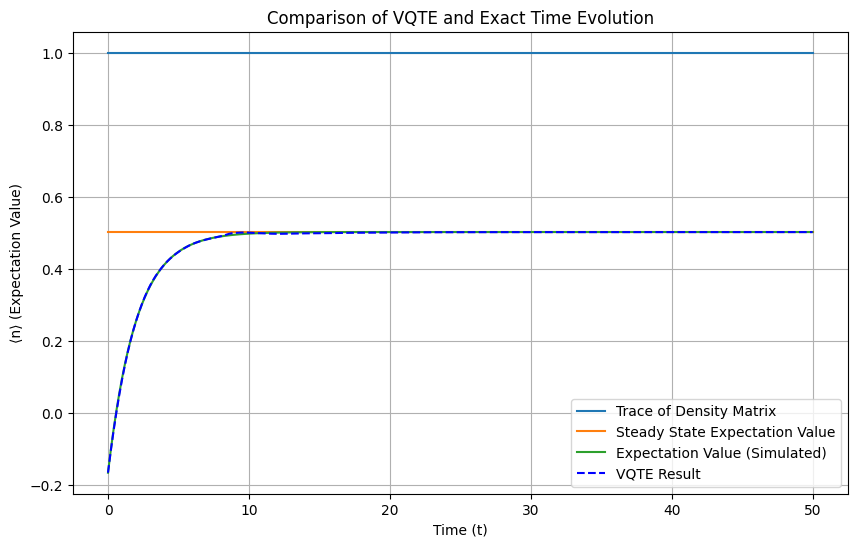

In [3]:
main()